In [41]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as pt
from datetime import datetime



In [40]:
transformer_train = torchvision.transforms.Compose([
    transforms.RandomCrop(32, padding= 4),
    torchvision.transforms.RandomHorizontalFlip(p=0.5),
    torchvision.transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
])

In [43]:
train_dataset = torchvision.datasets.CIFAR10(root='.', train=True, transform= transformer_train, download=True)
test_dataset =  torchvision.datasets.CIFAR10(root='.', train=False, transform= transforms.ToTensor(), download=True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [3]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [4]:
train_dataset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [20]:
K = len(set(train_dataset.targets))
print(K)

10


In [19]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [21]:
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)

for x,y in tmp_loader:
  print(x)
  print(x.shape)
  break

tensor([[[[0.9412, 0.9294, 0.9294,  ..., 0.9294, 0.9294, 0.9294],
          [0.9294, 0.9176, 0.9216,  ..., 0.9216, 0.9216, 0.9216],
          [0.9373, 0.9294, 0.9255,  ..., 0.9255, 0.9255, 0.9255],
          ...,
          [0.0431, 0.0353, 0.0863,  ..., 0.0588, 0.1020, 0.0510],
          [0.0392, 0.0706, 0.1373,  ..., 0.1255, 0.0941, 0.0667],
          [0.1176, 0.1922, 0.1529,  ..., 0.1843, 0.1373, 0.0745]],

         [[0.9412, 0.9294, 0.9294,  ..., 0.9294, 0.9294, 0.9294],
          [0.9294, 0.9176, 0.9216,  ..., 0.9216, 0.9216, 0.9216],
          [0.9373, 0.9294, 0.9255,  ..., 0.9255, 0.9255, 0.9255],
          ...,
          [0.0510, 0.0471, 0.1020,  ..., 0.0588, 0.1020, 0.0510],
          [0.0549, 0.0863, 0.1608,  ..., 0.1294, 0.0980, 0.0706],
          [0.1294, 0.2078, 0.1725,  ..., 0.2000, 0.1490, 0.0863]],

         [[0.9412, 0.9294, 0.9294,  ..., 0.9294, 0.9294, 0.9294],
          [0.9216, 0.9098, 0.9137,  ..., 0.9216, 0.9216, 0.9216],
          [0.9373, 0.9294, 0.9294,  ..., 0

In [29]:
# class CNN(nn.Module):
#   def __init__(self, K):
#     super(CNN, self).__init__()
#     self.conv1 = nn.Conv2d(3, 32,   kernel_size=3, stride=2 )
#     self.conv2 = nn.Conv2d(32, 64,  kernel_size=3, stride=2 )
#     self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2 )
#     self.fc1 = nn.Linear(128*3*3,1024)
#     self.fc2 = nn.Linear(1024, K)

#   def forward(self, x):
#     x = F.relu(self.conv1(x))
#     x = F.relu(self.conv2(x))
#     x = F.relu(self.conv3(x))
#     x = x.view(-1,128*3*3)
#     x= F.dropout(x, p=0.5)
#     x= F.relu(self.fc1(x))
#     x= F.dropout(x, p=0.2)
#     x = self.fc2(x)
#     return x

In [57]:
class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()
    self.conv1= nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1 ),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1 ),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(2),
        )
    self.conv2= nn.Sequential(
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1 ),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1 ),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2),
        )
    self.conv3= nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1 ),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1 ),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2),
        )


    self.fc1 = nn.Linear(128*4*4, 1024)
    self.fc2 = nn.Linear(1024, K)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = x.view(x.size(0), -1)
    x = F.dropout(x, p=0.5)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, p=0.2)
    x = self.fc2(x)
    return x

In [58]:
model  = CNN(K)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel

In [59]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [61]:
def batch_gd(model, criterion, optimizer, train_loader, test_loader, n_epochs = 1000 ):
  train_losses = np.zeros(n_epochs)
  test_losses = np.zeros(n_epochs)
  # total number of iteration is in fact #n_epochs * #batches
  for it in range(n_epochs):
    model.train()
    t0 = datetime.now()
    train_loss = []
    for inputs,targets in train_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      loss.backward()
      optimizer.step()
      train_loss.append(loss.item())
    train_loss = np.mean(train_loss)

    test_loss = []
    for inputs,targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())

    test_loss = np.mean(test_loss)

    train_losses[it] = train_loss
    test_losses[it] = test_loss
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{n_epochs}, Train Loss {train_loss.item():.4f}, Test Loss {test_loss.item():.4f}, Duration: {dt}')
  return train_losses, test_losses

In [62]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, n_epochs = 15)

Epoch 1/15, Train Loss 1.2816, Test Loss 0.9691, Duration: 0:06:45.234730
Epoch 2/15, Train Loss 0.8306, Test Loss 0.7630, Duration: 0:06:49.739553
Epoch 3/15, Train Loss 0.6698, Test Loss 0.6950, Duration: 0:06:23.517498
Epoch 4/15, Train Loss 0.5725, Test Loss 0.6524, Duration: 0:06:23.414849
Epoch 5/15, Train Loss 0.4901, Test Loss 0.6334, Duration: 0:06:25.435785
Epoch 6/15, Train Loss 0.4370, Test Loss 0.6119, Duration: 0:06:25.090928
Epoch 7/15, Train Loss 0.3778, Test Loss 0.6301, Duration: 0:06:27.254029
Epoch 8/15, Train Loss 0.3336, Test Loss 0.6328, Duration: 0:06:25.430459
Epoch 9/15, Train Loss 0.3039, Test Loss 0.6328, Duration: 0:06:24.116301
Epoch 10/15, Train Loss 0.2690, Test Loss 0.6808, Duration: 0:06:24.615815
Epoch 11/15, Train Loss 0.2459, Test Loss 0.6737, Duration: 0:06:25.203278
Epoch 12/15, Train Loss 0.2292, Test Loss 0.6851, Duration: 0:06:27.731452
Epoch 13/15, Train Loss 0.2088, Test Loss 0.6987, Duration: 0:06:24.799359
Epoch 14/15, Train Loss 0.1928, Te

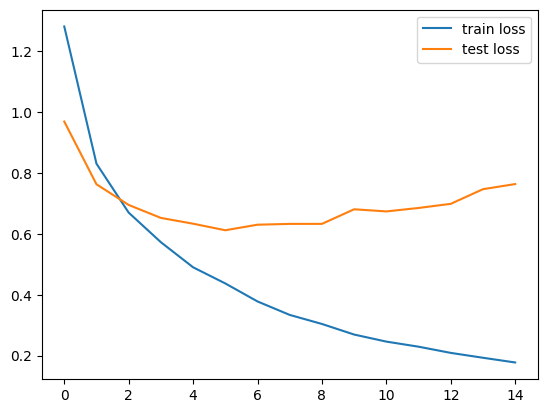

In [63]:
import matplotlib.pyplot as plt
plt.plot(train_losses, label = "train loss")
plt.plot(test_losses, label = "test loss")
plt.legend()
plt.show()

In [70]:
model.eval()
n_total = 0
n_correct = 0
for inputs, targets in train_loader:
  #inputs, targets = inputs.to(device), targets.to(device)

  outputs = model(inputs)
  _, prediction = torch.max(outputs, 1)
  n_correct  += (prediction == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0
n_total = 0
for inputs, targets in test_loader:
  # inputs, targets = inputs.to(device), targets.to(device)

  outputs = model(inputs)
  _, prediction = torch.max(outputs, 1)
  n_correct  += (prediction == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total

In [72]:
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4}")

Train acc: 0.9281, Test acc: 0.7973


Confusion matrix, without normalization
[[821  15  43  29   6   6   6   8  48  18]
 [ 11 897   4   8   1   3   3   2  23  48]
 [ 48   2 735  88  32  42  21  23   7   2]
 [ 13   2  49 741  20 110  16  33  10   6]
 [ 13   1  71  99 701  37  14  58   4   2]
 [  4   1  38 198  17 699   4  35   1   3]
 [ 10   3  64 101  16  32 749   9   7   9]
 [ 13   1  12  59  24  26   0 854   0  11]
 [ 48  14  13  14   5   2   0   7 873  24]
 [ 23  65   3   9   1   5   3   7  15 869]]


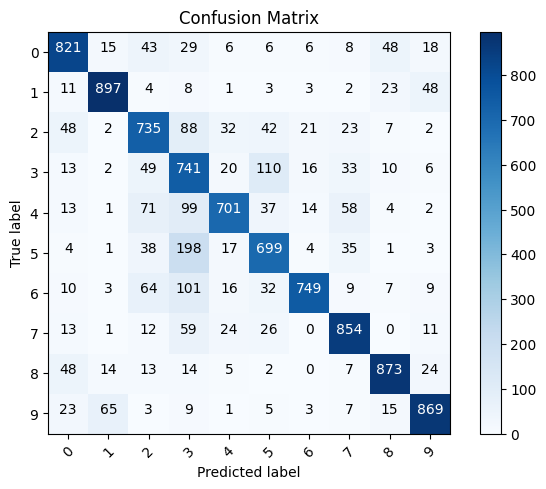

In [73]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")

  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'

  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])
for inputs, targets in test_loader:
  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)

  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 5 Predicted: 3')

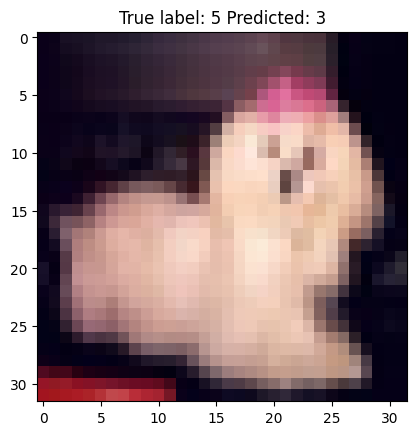

In [74]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], int(p_test[i])))

In [75]:
from torchsummary import summary
summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,248
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
         MaxPool2d-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          18,496
              ReLU-9           [-1, 64, 16, 16]               0
      BatchNorm2d-10           [-1, 64, 16, 16]             128
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
        MaxPool2d-14             [-1, 6